In [2]:
from keras.datasets import mnist
from keras import utils
import matplotlib.pyplot as plt

import numpy as np

import warnings
# warnings.filterwarnings('ignore')

Using TensorFlow backend.


# Preprocessing

## Load Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

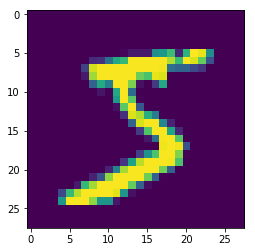

In [4]:
plt.imshow(x_train[0])

## deal with x
### take a look at x_train

* x_train image number=60000, size=28*28, dtype=uint8, value=0~255
* x_test image number=10000, size=28*28, dtype=uint8, value=0~255


In [5]:
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)

Shape of x_train:  (60000, 28, 28)
Shape of x_test:  (10000, 28, 28)


### proprocess x 

reshape 成 28 * 28 * 1, 1 代表是單色的

如果是28 * 28的彩色圖片，實際上的維度是 28*28*3，因為圖片是由 RGB三個顏色組成

In [6]:
# add one dimension for color
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train.shape

(60000, 28, 28, 1)

原本灰階的圖片數值是0~255，把它變成0~1

In [7]:
# convert value inside x from 0~255 to 0~1
x_train = x_train / 255
x_test = x_test / 255

## deal with y

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[0]

5

### preprocess y
one hot encoding

convert class vectors to binary class matrices

In [10]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Model functions

## Build model

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D, MaxPool2D, Flatten
from keras.optimizers import RMSprop, SGD, Adam
from keras.initializers import RandomUniform, Constant
from keras.activations import relu

In [13]:
def build_model(activation, initializer):
    model = Sequential()

    model.add(Conv2D(filters=16, #總共有16張filter
                     kernel_size=(3,3), #每張filter的大小是3*3
                     padding='same', #填充輸入以使輸出具有與原始輸入相同的長度
                     input_shape=(28,28,1),
                     activation=activation))

    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=36,
                     kernel_size=(3,3),
                     padding='same',
                     activation=activation))

    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Dropout(rate=0.25))

    model.add(Flatten())

    model.add(Dense(128, 
                    activation=activation, 
                    kernel_initializer=initializer))

    model.add(Dropout(rate=0.25))

    model.add(Dense(10, activation='softmax'))

    model.summary()
    
    return model

In [45]:
def compile_model(model, learning_rate, optimizer):
    optimizer.lr=learning_rate
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

In [46]:
def fit_model(model):
    train_history = model.fit(x_train, 
                    y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=2,
                    validation_split=0.2)
    return train_history

In [47]:
def train_model(activation='relu', learning_rate=0.01, initializer='glorot_uniform', optimizer=SGD()):
    model = build_model(activation, initializer)
    model = compile_model(model, learning_rate, optimizer)
    return model, fit_model(model)

## print accuracy and loss curve

In [41]:
def print_history(train_history, mode):
    plt.plot(train_history.history[mode])
    plt.plot(train_history.history["".join(('val_', mode))])
    plt.ylabel(mode)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## evaluate model

In [42]:
def evaluate_model(model):
    scores = model.evaluate(x_test , y_test)
    print("test data loss: ", scores[0], "\ntest data accuracy: ", scores[1])

# Start Testing

## adjust activation function

### relu

In [48]:
model_relu, history_relu = train_model('relu')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               225920    
__________

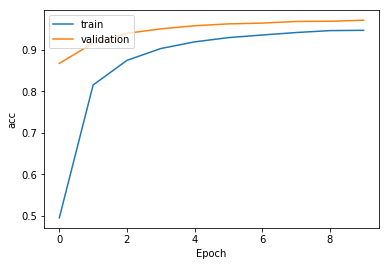

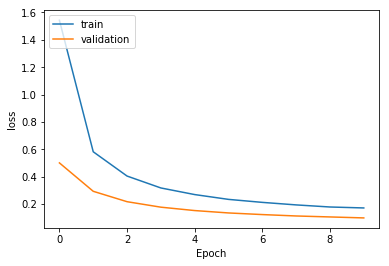

In [49]:
print_history(history_relu, 'acc')
print_history(history_relu, 'loss')

In [50]:
evaluate_model(model_relu)

10000/10000 [==============================] - 1s 77us/step
test data loss:  0.09370322021357715 
test data accuracy:  0.9707


### sigmoid

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               225920    
__________

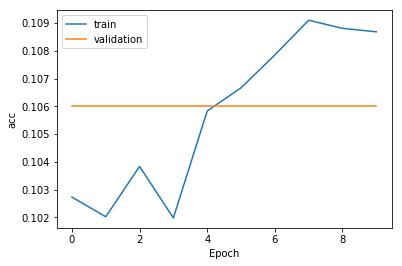

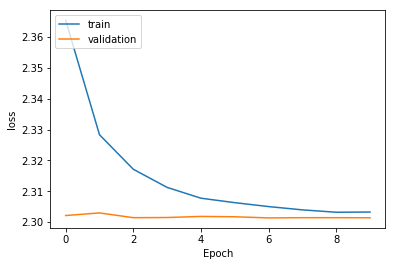

10000/10000 [==============================] - 1s 95us/step
test data loss:  2.3003594985961913 
test data accuracy:  0.1135


In [51]:
model_sigmoid, history_sigmoid = train_model('sigmoid')

print_history(history_sigmoid, 'acc')
print_history(history_sigmoid, 'loss')

evaluate_model(model_sigmoid)

## adjust learning rate

### learning rate = 0.005

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               225920    
__________

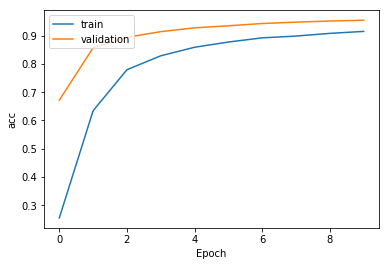

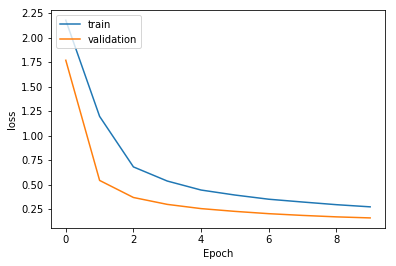

10000/10000 [==============================] - 1s 79us/step
test data loss:  0.15807005092650653 
test data accuracy:  0.9533


In [52]:
model_sigmoid, history_sigmoid = train_model('relu', 0.005)

print_history(history_sigmoid, 'acc')
print_history(history_sigmoid, 'loss')

evaluate_model(model_sigmoid)

### learning rate = 0.02

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1764)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               225920    
__________

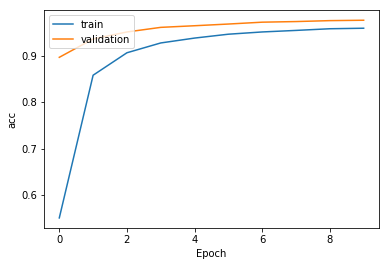

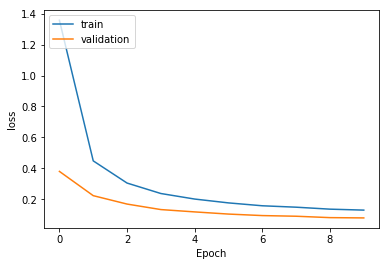

10000/10000 [==============================] - 1s 84us/step
test data loss:  0.07154401374720037 
test data accuracy:  0.9772


In [53]:
model_sigmoid, history_sigmoid = train_model('relu', 0.02)

print_history(history_sigmoid, 'acc')
print_history(history_sigmoid, 'loss')

evaluate_model(model_sigmoid)

### learning rate = 0.05

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1764)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               225920    
__________

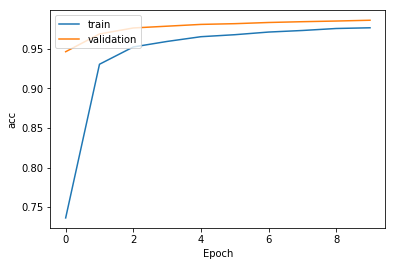

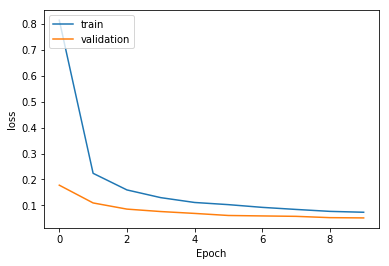

10000/10000 [==============================] - 1s 76us/step
test data loss:  0.03944321423316142 
test data accuracy:  0.9876


In [54]:
model_sigmoid, history_sigmoid = train_model('relu', 0.05)

print_history(history_sigmoid, 'acc')
print_history(history_sigmoid, 'loss')

evaluate_model(model_sigmoid)

## adjust initializer

### initializer = zeros

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1764)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               225920    
__________

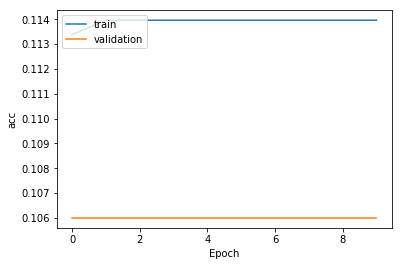

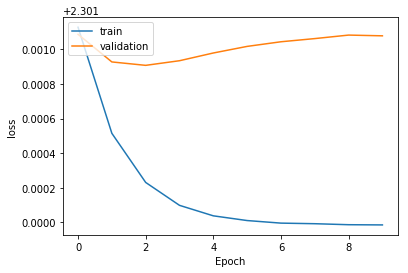

10000/10000 [==============================] - 1s 94us/step
test data loss:  2.301005591583252 
test data accuracy:  0.1135


In [55]:
model_sigmoid, history_sigmoid = train_model('relu', 0.01, 'zeros')

print_history(history_sigmoid, 'acc')
print_history(history_sigmoid, 'loss')

evaluate_model(model_sigmoid)

### initializer = constant(0.5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1764)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               225920    
__________

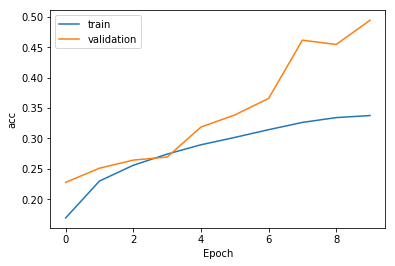

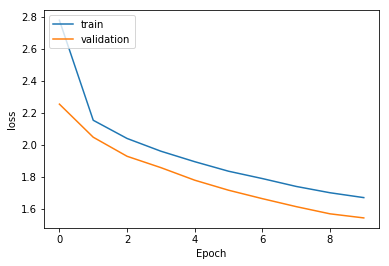

10000/10000 [==============================] - 1s 84us/step
test data loss:  1.5390481349945069 
test data accuracy:  0.4955


In [58]:
model_sigmoid, history_sigmoid = train_model('relu', 0.01, Constant(value=0.5))

print_history(history_sigmoid, 'acc')
print_history(history_sigmoid, 'loss')

evaluate_model(model_sigmoid)

## compare with paper
* initial weight = 0.3 ~ -0.3
* alpha = 0.9
* lr = 0.1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1764)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               225920    
__________

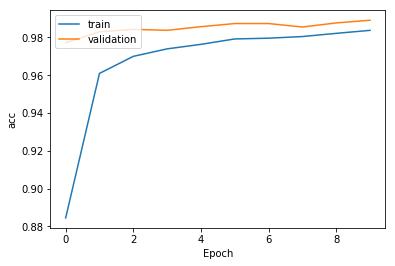

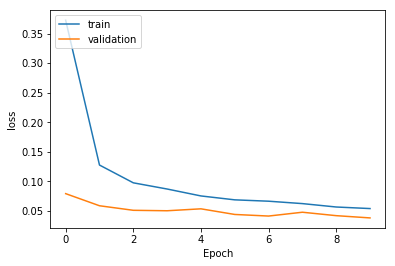

10000/10000 [==============================] - 1s 80us/step
test data loss:  0.033908480236506874 
test data accuracy:  0.9892


In [59]:
model_sigmoid, history_sigmoid = train_model('relu', 0.1, RandomUniform(-0.03, 0.03), SGD(lr=0.1, momentum=0.9))

print_history(history_sigmoid, 'acc')
print_history(history_sigmoid, 'loss')

evaluate_model(model_sigmoid)